# Detecting Topic Merges and Splits in Dynamic Political Conversations

Cláudia Oliveira 

Supervisor - Prof. Dr. Álvaro Figueira

Faculty of Science, University of Porto

The objective of this code is to get a first look at the data and to gather all the datasets containing the tweets posted by each member of the 119th Congress in to one single dataset 

Importing the needed packages:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

Importing the dataset with congress members information

In [22]:
members = pd.read_excel("datasets/Twitters_19thCongressMembers.xlsx")
members = members.iloc[:, :8]
members.head(5)

,Name,Role,State,District,Party,Served,Active On X,Account
0,"Adams, Alma S.",Representative,North Carolina,12,Democratic,House: 2014-Present,Yes,"""@RepAdams"""
1,"Aderholt, Robert B.",Representative,Alabama,4,Republican,House: 1997-Present,Yes,"""@Robert_Aderholt"""
2,"Aguilar, Pete",Representative,California,33,Democratic,House: 2015-Present,Yes,"""@RepPeteAguilar"""
3,"Alford, Mark",Representative,Missouri,4,Republican,House: 2023-Present,Yes,"""@RepMarkAlford"""
4,"Allen, Rick W.",Representative,Georgia,12,Republican,House: 2015-Present,Yes,"""@RepRickAllen"""


#### Now, I'll be answering the following questions about the congress members:

1) How many are democrats, republicans and independents?

2) How many are active on X?

#### 1) How many are democrats, republicans and independents?

Party
Republican     277
Democratic     266
Independent      2
Name: count, dtype: int64


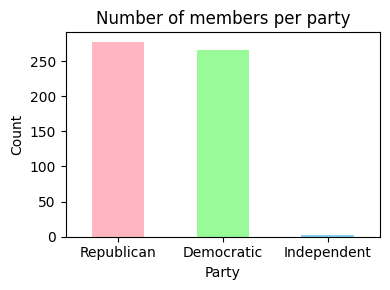

In [23]:
party_counts = members["Party"].value_counts()

print(party_counts)

colors = ["#ffb6c1", "#98fb98", "#87ceeb"] 

plt.figure(figsize=(4,3))  
party_counts.plot(kind="bar", color=colors[:len(party_counts)])
plt.title("Number of members per party")
plt.xlabel("Party")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Only two independents but there is balance between democrats and republicans

#### 2) How many are active on X?

In [24]:
active = members["Active On X"].value_counts()

print(active)

Active On X
Yes    544
No       1
Name: count, dtype: int64


Only one person doesn't have a professional X account

#### Now, I'll will create the main dataset

First, I'll clean the collumn "Account" from members and keep only the members that have an active professional account

In [25]:
members["Account"] = members["Account"].str.replace('"', '', regex=False)
members["Account"] = members["Account"].str.replace("@", "", regex=False)

members_active = members[members["Active On X"] == "Yes"].copy()

Now, let's gather all the info from all the members 

In [26]:
tweets_folder = "datasets/TweetsFromEachMember"

all_dataframes = []

for filename in os.listdir(tweets_folder):
    if filename.endswith(".csv") and filename.startswith("TwExportly_"):
        filepath = os.path.join(tweets_folder, filename)

        match = re.match(r"TwExportly_(.*?)_tweets_", filename)
        if not match:
            continue
        account_name = match.group(1) 

        member_info = members_active[members_active["Account"] == account_name]
        if member_info.empty:
            continue

        try:
            tweets_df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            continue

        if tweets_df.empty:
            continue

        member_info_repeated = pd.concat([member_info] * len(tweets_df), ignore_index=True)
        merged_df = pd.concat([member_info_repeated.reset_index(drop=True),
                               tweets_df.reset_index(drop=True)], axis=1)

        all_dataframes.append(merged_df)

Final dataset:

In [27]:
df = pd.concat(all_dataframes, ignore_index=True)
df.head(5)

,Name,Role,State,District,Party,Served,Active On X,Account,tweet_id,text,...,favorite_count,retweet_count,reply_count,view_count,created_at,client,hashtags,urls,media_type,media_urls
0,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,Yes,AOC,'1969522226455019889',Why are you tweeting your private likes?,...,314392,12823,6714,11858695.0,2025-09-20 23:01:05,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN
1,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,Yes,AOC,'1969507666415280631',Let’s go @RepYvetteClarke! \n\n💙 UNITY. 💙,...,3945,326,1046,498925.0,2025-09-20 22:03:14,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN
2,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,Yes,AOC,'1969505961732612540',Who’s the illegal now @RealTomHoman,...,66362,10943,4482,3060799.0,2025-09-20 21:56:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN
3,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,Yes,AOC,'1969074559602110509',We should be clear about who Charlie Kirk was:...,...,131677,18649,37381,18841404.0,2025-09-19 17:22:13,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN
4,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,Yes,AOC,'1965876680553279580',The scourge of gun violence and political viol...,...,72656,4338,34962,9975357.0,2025-09-10 21:34:59,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN


Info about the dataset:

In [28]:
num_rows, num_col = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of collumns: {num_col}")
print(f"Collumns: {df.columns}")
print("Number of missing values per collumn:")
print(df.isna().sum())

Number of rows: 359146
Number of collumns: 23
Collumns: Index(['Name', 'Role', 'State', 'District', 'Party', 'Served', 'Active On X',
       'Account', 'tweet_id', 'text', 'language', 'type', 'bookmark_count',
       'favorite_count', 'retweet_count', 'reply_count', 'view_count',
       'created_at', 'client', 'hashtags', 'urls', 'media_type', 'media_urls'],
      dtype='object')
Number of missing values per collumn:
Name                   0
Role                   0
State                  0
District           85330
Party                  0
Served                 0
Active On X            0
Account                0
tweet_id               0
text                   1
language               0
type                   0
bookmark_count         0
favorite_count         0
retweet_count          0
reply_count            0
view_count            10
created_at             0
client                 0
hashtags          335561
urls              303680
media_type        190859
media_urls        190859
dtyp

Collumn "Active On X is no needed anymore since all members in df are active and de starting day will be 26/09/2024 so we have 52 full 7 day weeks

In [29]:
df = df.drop(columns=["Active On X"])
df['created_at'] = pd.to_datetime(df['created_at'])
df = df[df['created_at'].dt.date != pd.to_datetime('2024-09-25').date()]

Saving the dataset:

In [31]:
df.to_csv("datasets/tweets.csv", index=False)

How many tweets per day?

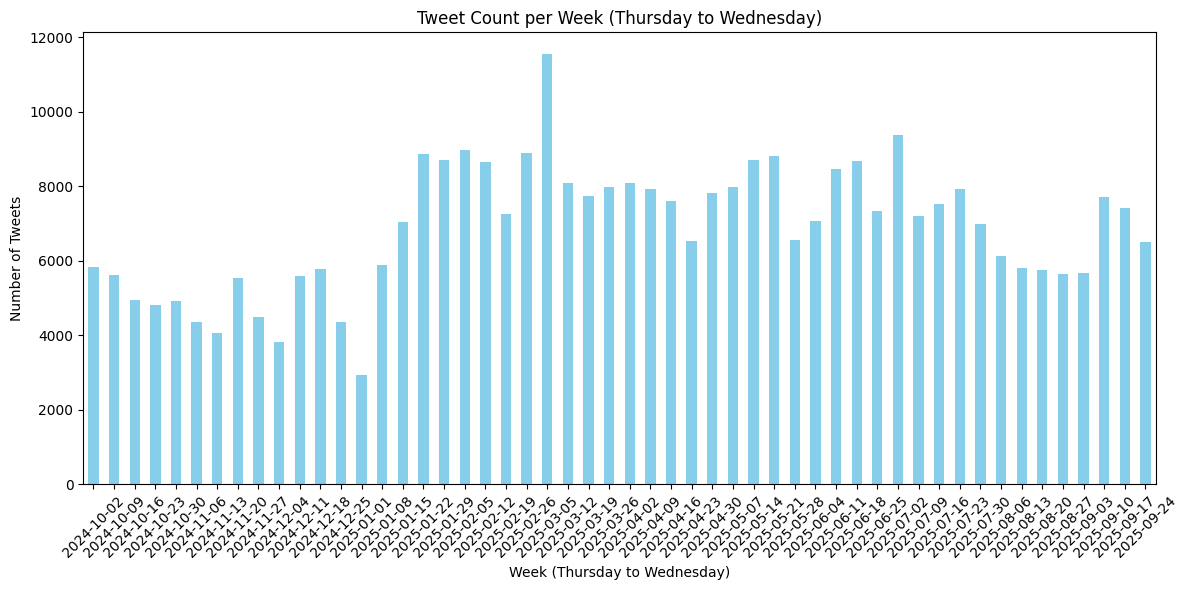

In [35]:
df['week'] = df['created_at'].dt.to_period('W-WED').apply(lambda r: r.end_time.date())
tweetsperweek = df.groupby('week').size()

plt.figure(figsize=(12,6))
tweetsperweek.plot(kind='bar', color='skyblue')
plt.xlabel('Week (Thursday to Wednesday)')
plt.ylabel('Number of Tweets')
plt.title('Tweet Count per Week (Thursday to Wednesday)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()